# Probe tone test

How to measure musical expectation is a question for both MIR and Music Cognition. Music psychologists have come up with a few methods for measuring musical expectation:

* **Method of Tone Detection**: Participants listen to tones in the presence of continuous loud noise. The listeners’ task is to indicate whether or not they heard the tone
* **Method of Production**: Listeners are presented with a stimulus (musical phrase), and they have to “sing” a continuation
* **Probe-Tone Method**: Listeners are presented with a stimulus and a probe-tone and are asked to tell how well does the probe tone “fit” the musical context

In this notebook we are going to explore this last method with a (mini) version of the most famous probe tone experiment: Krumhansl and Kessler probe tone experiment for determining tonal hierarchies in pitch perception!

## Generating the Stimuli

In [1]:
# Let's import some stuff
import os

# Uncomment this line if the kernel keeps crashing
# See https://stackoverflow.com/a/53014308
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

import IPython.display as ipd
import ipywidgets as widgets
import numpy as np
import partitura as pt
from partitura.utils.synth import synthesize, SAMPLE_RATE

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

RNG = np.random.RandomState(1984)

%config InlineBackend.figure_format ='retina'

Let's generate the stimuli!

In [2]:
# This is just one of the contexts used by Krumhansl and Kessler in their original study ;)
stimulus = pt.load_score(os.path.join("data", "stimulus.musicxml"))

note_array = stimulus.note_array()

# Generate the stimuli: The context + a probe tone
probe_tone_stimuli = []
for probe_tone in range(12):
    stimulippt = np.zeros(len(note_array) + 1, dtype=note_array.dtype)

    stimulippt[:-1] = note_array
    stimulippt[-1]["onset_beat"] = note_array["onset_beat"].max() + 3
    stimulippt[-1]["duration_beat"] = 2
    stimulippt[-1]["pitch"] = 60 + probe_tone

    # Synthesize the audio using Shepard tones
    audio_signal = synthesize(
        stimulippt, harmonic_dist="shepard", samplerate=SAMPLE_RATE, bpm=108
    )
    probe_tone_stimuli.append(audio_signal)

## The listening experiment

For the listening experiment we are going to use a slider to determine how well does the probe tone fit the musical context.

In [3]:
def probe_tone_slider(idx: int) -> widgets.IntSlider:
    """
    Get audio player + slider for a probe tone stimuli

    Parameters
    ----------
    idx : int
        Index of the probe tone stimuli

    Returns
    -------
    slider : widgets.IntSlider
        An interactive slider for annotating the rating of the
        probe tone.
    """

    # Display audio player
    ipd.display(
        ipd.Audio(data=probe_tone_stimuli[idx], rate=SAMPLE_RATE, normalize=False)
    )
    slider = widgets.IntSlider(
        value=4,
        min=1,  # The probe tone does not fit very well
        max=7,  # The probe tone fits very well
        step=1,
        description="rating",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True,
        readout_format="d",
    )
    ipd.display(slider)
    return slider

In [4]:
# We randomize the stimuli!
random_idx = np.arange(len(probe_tone_stimuli))

RNG.shuffle(random_idx)

sliders = dict()
for i, idx in enumerate(random_idx):
    print(f"stimulus {i + 1}/12")
    sliders[idx] = probe_tone_slider(idx)

stimulus 1/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 2/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 3/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 4/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 5/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 6/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 7/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 8/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 9/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 10/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 11/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

stimulus 12/12


IntSlider(value=4, continuous_update=False, description='rating', max=7, min=1)

## Visualizing the results and comparing to Krumhansl's original results

Let's visualize our results and compare them to Krumhansl and Kessler's original profiles

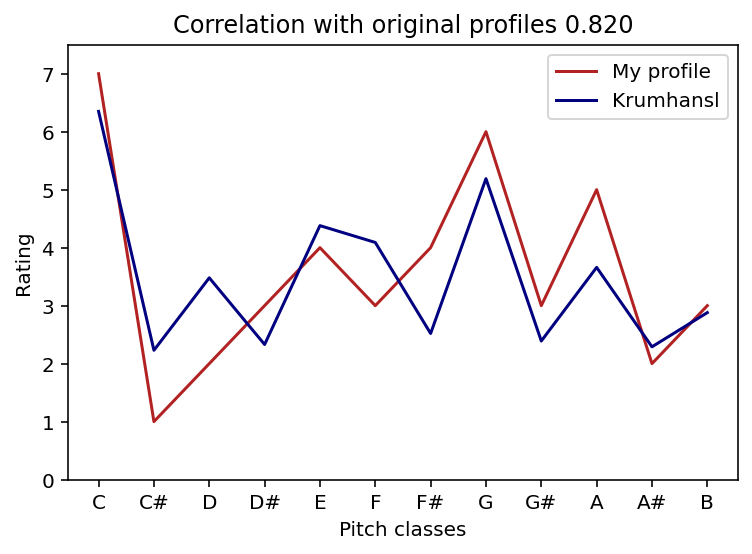

In [5]:
# The original profiles from Krumhansl's "Cognitive Foundations of Musical Pitch" pp.30
key_prof_maj_kk = np.array(
    [6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88]
)

# Our own probe tone profiles!
probe_tone_profiles = np.array([sliders[i].value for i in range(12)])

# Correlation with the original profiles
corr = np.corrcoef(key_prof_maj_kk, probe_tone_profiles)[0, 1]

# Plot the profiles
fig, ax = plt.subplots()
ax.plot(probe_tone_profiles, c="firebrick", label="My profile")
ax.plot(key_prof_maj_kk, c="navy", label="Krumhansl")
ax.set_xticks(range(12))
ax.set_xticklabels(["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"])
ax.set_xlabel("Pitch classes")
ax.set_ylabel("Rating")
ax.set_ylim((0, 7.5))
plt.legend()
ax.set_title(f"Correlation with original profiles {corr:.3f}")
plt.show()